## Toy Model 1: 2 spatial modes with different oscillating frequencies

### Created by Yuying Liu, 09/23/2019

$$\Phi(x, t) = u(x)cos(\omega_0 t) + v(x)cos(\omega_1 t + \frac{\pi}{4})$$

In [104]:
# imports
import os
import sys
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
import torch_cae_multilevel_V4 as net
import ResNet as tnet
import utils

## MrCAE

Below is the progressive training framework. 
One could have flexible control over each training step: low-level models are cheap to obtain, and higher level models are built based on them -- one can always revert back to the previous level and adjust the parameters to re-train the model if it is not satisfying. 

(5000, 127, 127)
self.data.shape =  torch.Size([5000, 1, 127, 127])


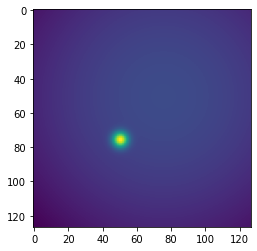

In [169]:
# init model & load data
data_path = '../data/toy1_longer'#toy1.npy'
model_path = '../model/toy1_longer'#pace_models'
result_path = '../result/toy1_longer/'

full_data_path = os.path.join(data_path, 'data.npy')
data = np.load(full_data_path)
plt.imshow(data[500])
print(data.shape)

dataset = net.MultiScaleDynamicsDataSet(full_data_path, n_levels=5, shuffle=False)


In [197]:
# training
archs = [[1]]#,[1,3,5,7]]
tols = [0.001]#, 0.0005]#, 0.0001]
# net.train_net(archs=archs, dataset=dataset, max_epoch=3000, batch_size=350, 
#               tols=tols, activation=torch.nn.Sequential(), w=0.5, model_path=model_path, 
#               result_path=result_path, std=0.01, verbose=3)

n_levels = 5
activation = torch.nn.Sequential()
use_maps = True
std = 0.01
verbose = 3
max_epoch=10
lr = 1e-3
tol = 0.001



cae_model =  net.CAE(n_levels=n_levels, activation=activation, use_maps=use_maps)

#start with deepening
cae_model.deeper_op(std=std)
if verbose > 1:
    print('model layers: ')
    print(list(model._modules.keys()))
val_losses, best_val_loss, mset = cae_model.train_arch(dataset, max_epoch=max_epoch, batch_size=batch_size,
                                                           lr=lr, tol=tol, verbose=verbose,)
        
# try:
#     model_space = torch.load(os.path.join(model_path, 'model_L0_0.pt'))
# except:
#     print("training new stage")
#     model_space = net.train_net_one_stage(mode=1, n_filters=1, dataset=dataset, max_epoch=3000, batch_size=350, result_path = result_path,
#                         load_model=None, tol=tols[0],std=0.01,  model_path=model_path, verbose=3)

using maps
model layers: 
['activation', 'increment']
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/10]
[training set] local: 0.0031/0.0061/0.0046, global: 0.0032/0.0485/0.0258
[validation set] local: 0.0030/0.0070/0.0050, global: 0.0030/0.0512/0.0271
epoch [1/10]:
[training set] local: 0.0031/0.0061/0.0046, global: 0.0032/0.0485/0.0258
[validation set] local: 0.0030/0.0070/0.0050, global: 0.0030/0.0512/0.0271
epoch [2/10]:
[training set] local: 0.0023/0.0066/0.0044, global: 0.0023/0.0510/0.0266
[validation set] local: 0.0022/0.0063/0.0043, global: 0.0022/0.0505/0.0263
epoch [3/10]:
[training set] local: 0.0017/0.0057/0.0037, global: 0.0017/0.0497/0.0257
[validation set] local: 0.0016/0.0057/0.0037, global: 0.0016/0.0499/0.0257
epoch [4/10]:
[training set] local: 0.0011/0.0050/0.0030, global: 0.0010/0.0469/0.0240
[validation set] local: 0.0011/0.0053/0.0032, global: 0.0011/0.0494/0.0253
epoch [5/10]:
[training set] local: 0.0007/0.0052/0.0029, global:

torch.Size([5000, 1, 7, 7])


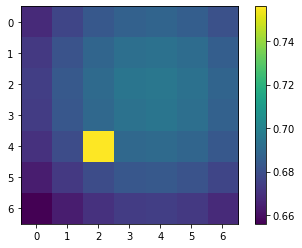

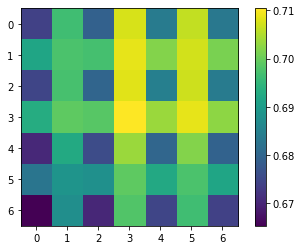

In [198]:
all_data = dataset.obtain_data_at_current_level_all(cae_model.cur_level)
predicted,_,_,_ = cae_model(all_data, cae_model.cur_level)
print(predicted.shape)

plt.imshow(all_data[0,0].detach().numpy())
plt.colorbar()
plt.show()

plt.imshow(predicted[0,0].detach().numpy())
plt.colorbar()
plt.show()

In [208]:
#doing first widening
print(cae_model.blocks)
print(cae_model._modules)
n_filters = 2
cae_model.wider_op(n_filters=n_filters, std=std)
print(cae_model.level_clear)
print(cae_model.blocks)

[1, 1, 1, 1, 1]
OrderedDict([('activation', Sequential()), ('L0_Conv_0', Conv2dBlock(
  (activation): ReLU()
  (B0): Conv2d(1, 1, kernel_size=(3, 3), stride=(2, 2))
)), ('L0_deConv_0', Conv2dBlock(
  (activation): ReLU()
  (B0): ConvTranspose2d(1, 1, kernel_size=(3, 3), stride=(2, 2))
)), ('L0_Conv_1', Conv2dBlock(
  (activation): Sequential()
  (B0): Conv2d(1, 2, kernel_size=(3, 3), stride=(2, 2))
)), ('L0_deConv_1', Conv2dBlock(
  (activation): Sequential()
  (B0): ConvTranspose2d(2, 1, kernel_size=(3, 3), stride=(2, 2))
))])
this level is clear, no need to widen the network! Abort.
{'0': True, '1': False, '2': False, '3': False, '4': False}
[1, 1, 1, 1, 1]


In [200]:
val_losses, best_val_loss, mset = cae_model.train_arch(dataset, max_epoch=max_epoch, batch_size=batch_size,
                                                           lr=lr, tol=tol, verbose=verbose)

i  =  1
i  =  1
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/10]
[training set] local: 0.0002/0.0051/0.0027, global: 0.0002/0.0503/0.0252
[validation set] local: 0.0002/0.0050/0.0026, global: 0.0002/0.0489/0.0246
epoch [1/10]:
[training set] local: 0.0002/0.0051/0.0027, global: 0.0002/0.0503/0.0252
[validation set] local: 0.0002/0.0050/0.0026, global: 0.0002/0.0489/0.0246
i  =  1
i  =  1
i  =  1
epoch [2/10]:
[training set] local: 0.0002/0.0050/0.0026, global: 0.0002/0.0502/0.0252
[validation set] local: 0.0002/0.0049/0.0026, global: 0.0002/0.0489/0.0246
i  =  1
i  =  1
i  =  1
epoch [3/10]:
[training set] local: 0.0003/0.0047/0.0025, global: 0.0003/0.0470/0.0236
[validation set] local: 0.0003/0.0049/0.0026, global: 0.0003/0.0489/0.0246
i  =  1
i  =  1
i  =  1
epoch [4/10]:
[training set] local: 0.0003/0.0049/0.0026, global: 0.0003/0.0487/0.0245
[validation set] local: 0.0003/0.0049/0.0026, global: 0.0003/0.0489/0.0246
i  =  1
i  =  1
i  =  1
epoch [

In [201]:
cae_model.resolved_maps

{'0': {'0': tensor([[1., 1., 1.],
          [0., 0., 1.],
          [0., 0., 1.]]),
  '1': tensor([[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]])},
 '1': {},
 '2': {},
 '3': {},
 '4': {}}

In [202]:
all_data = dataset.obtain_data_at_current_level_all(cae_model.cur_level)
predicted,_,_,_ = cae_model(all_data, cae_model.cur_level)

i  =  1


torch.Size([5000, 1, 7, 7])


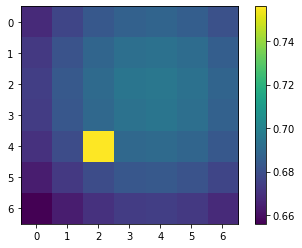

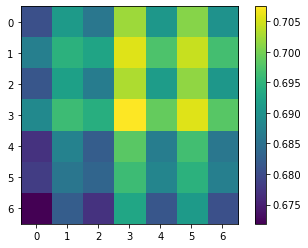

In [203]:
print(predicted.shape)

plt.imshow(all_data[0,0].detach().numpy())
plt.colorbar()
plt.show()

plt.imshow(predicted[0,0].detach().numpy())
plt.colorbar()
plt.show()

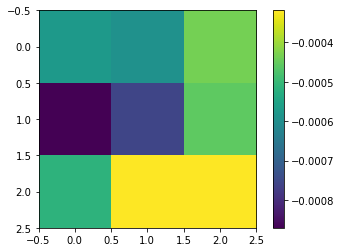

In [211]:
encoded = cae_model.encode(all_data, cae_model.cur_level)
plt.imshow(encoded[0,0].detach().numpy())
plt.colorbar()

In [205]:
print("mse = ", np.mean((all_data[0,0].detach().numpy() 
                         - predicted[0,0].detach().numpy())**2))

mse =  0.00022711414


In [26]:
print(model_space.cur_level)
all_data = dataset.obtain_data_at_current_level_all(model_space.cur_level)
print(all_data.shape)
train_data, val_data, test_data =dataset.obtain_data_at_current_level(model_space.cur_level)
encoded = model_space.encode(all_data, model_space.cur_level)
print(encoded.shape)
train_encoded = model_space.encode(train_data, model_space.cur_level).reshape((1, len(train_data), len(encoded[0,0])**2))
val_encoded = model_space.encode(val_data, model_space.cur_level).reshape((1, len(val_data), len(encoded[0,0])**2))
test_encoded = model_space.encode(test_data, model_space.cur_level).reshape((1, len(test_data), len(encoded[0,0])**2))

print(train_encoded.shape)
print(val_encoded.shape)
print(test_encoded.shape)

0
torch.Size([5000, 1, 7, 7])
torch.Size([5000, 1, 3, 3])
torch.Size([1, 3500, 9])
torch.Size([1, 1000, 9])
torch.Size([1, 500, 9])


torch.Size([5000, 1, 3, 3])


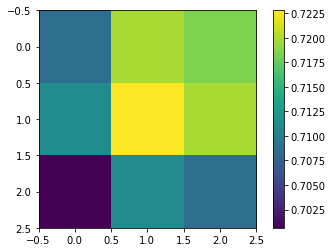

In [154]:
print(encoded.shape)
plt.imshow(encoded[500,0].detach().numpy())
plt.colorbar()

In [119]:
#make more training points, more and less timesteps per
n_timesteps_per_point = len(test_encoded[0])
print(n_timesteps_per_point)
total_time_points = len(train_encoded[0])
n_points = total_time_points//n_timesteps_per_point
print(n_points)
train_encoded_more = torch.cat(
    (train_encoded[:,:n_timesteps_per_point], train_encoded[:,n_timesteps_per_point:2*n_timesteps_per_point]), 0)
print(train_encoded_more.shape)
for i in range(2,n_points):
    train_encoded_more = torch.cat(
    (train_encoded_more, train_encoded[:,(i*n_timesteps_per_point):((i+1)*n_timesteps_per_point)]), 0)

print(train_encoded_more.shape)

500
7
torch.Size([2, 500, 9])
torch.Size([7, 500, 9])


In [120]:
#getting time inputs
# t = np.linspace(0, 8*np.pi, 500)
k = 0                         # model index: should be in {0, 2, ..., 10}
dt = 1#t[1] - t[0]              # time unit: 0.0005 for Lorenz and 0.01 for others
system = 'toy1_longer'
noise = 0.0                   # noise percentage: 0.00, 0.01 or 0.02

lr = 1e-3                     # learning rate
max_epochs = 10000            # the maximum training epoch 
batch_size = 320              # training batch size
min_k = 7
max_k = 8

print(val_encoded.shape)
_,n_steps, total_dim= val_encoded.shape
n_steps = n_steps - 1
# total_dim = n_per_dim **2
print("total_dim = ", total_dim)
arch = [total_dim, 128, 128, 128, total_dim] 

# global const
n_forward = 5
step_size = 2**k

criterion = torch.nn.MSELoss(reduction='none')
# print(dt)
# dataset = tnet.DataSet(train_encoded, val_encoded, test_encoded, dt, step_size, n_forward)

torch.Size([1, 1000, 9])
total_dim =  9


In [122]:
#do time training 
time_models = list()
step_sizes = list()
for k in range(min_k, max_k):
    print("k = ", k)
    step_size = 2**k
    step_sizes.append(step_size)
    dataset = tnet.DataSet(train_encoded, val_encoded, test_encoded, dt, step_size, n_forward)#tnet.DataSet(train_data, val_data, test_data, dt, step_size, n_forward)
#     print(dataset.train_x.shape)
    model_name = 'model_D{}_noise{}_0.pt'.format(step_size, noise)
    model_path_this = os.path.join(model_path, model_name)

    # create/load model object
    try:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        model_time = torch.load(model_path_this, map_location=device)
        model_time.device = device
    except:
        print('create model {} ...'.format(model_name))
        print('dt = ', dt)
        model_time = tnet.ResNet(arch=arch, dt=dt, step_size=step_size)

    # training
    model_time.train_net(dataset, max_epoch=max_epochs, batch_size=batch_size, lr=lr,
                    model_path=os.path.join(model_path, model_name))
    
# load models
# for step_size in step_sizes:
    print('load model_D{}.pt'.format(step_size))
    time_models.append(torch.load(model_path_this, map_location='cpu'))
    
# fix model consistencies trained on gpus (optional)
for model in time_models:
    model.device = 'cpu'
    model._modules['increment']._modules['activation'] = torch.nn.ReLU()

k =  7
create model model_D128_noise0.0_0.pt ...
dt =  1
self.n_dim=  9
dataset.n_dim =  9
epoch 1000, training loss 2.0503832274698652e-05, validation loss 7.909016858320683e-05
(--> new model saved @ epoch 1000)
epoch 2000, training loss 2.1956995624350384e-05, validation loss 5.943217911408283e-05
(--> new model saved @ epoch 2000)
epoch 3000, training loss 9.95808750303695e-06, validation loss 5.629582665278576e-05
(--> new model saved @ epoch 3000)
epoch 4000, training loss 5.986873475194443e-06, validation loss 6.0043123085051775e-05
epoch 5000, training loss 2.0902056348859333e-05, validation loss 8.610048098489642e-05
epoch 6000, training loss 4.341592102719005e-06, validation loss 5.306808088789694e-05
(--> new model saved @ epoch 6000)
epoch 7000, training loss 2.154743697246886e-06, validation loss 4.297576015233062e-05
(--> new model saved @ epoch 7000)
epoch 8000, training loss 7.0469272941409145e-06, validation loss 4.619165338226594e-05
epoch 9000, training loss 4.874408

In [11]:
val_encoded.shape

torch.Size([1, 1000, 9])

torch.Size([1, 1000, 9])
y_preds.shape = torch.Size([1, 999, 9])
criterion(torch.tensor(val_encoded[:, 1:, :]).float(), y_preds) shape = torch.Size([1, 999])
1

err.shape =  torch.Size([1, 999])
(999,)


<ipython-input-123-3407d4bb2a8f>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds = model.uni_scale_forecast(torch.tensor(val_encoded[:, 0, :]).float(), n_steps=n_steps)
C:\Users\16kat\OneDrive - acornonsite.com\Time_Space_multiscale\src\ResNet.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds.insert(0, torch.tensor(x_init).float().to(self.device))
<ipython-input-123-3407d4bb2a8f>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print('criterion(torch.tensor(val_encoded[:, 1:, :]).float(), y_preds) shape =', criterion(t

(1e-05, 10)

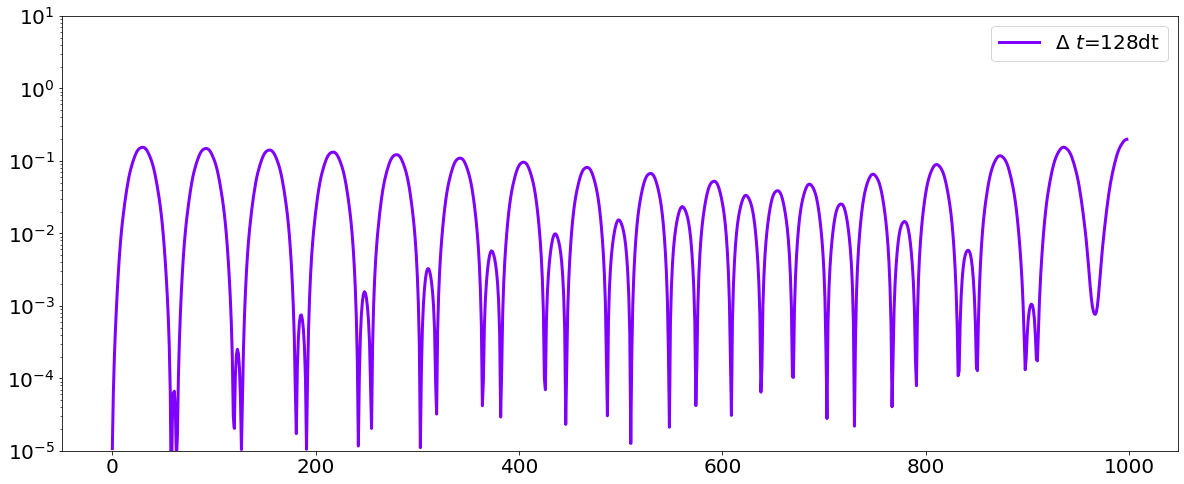

In [123]:
# # uniscale time-stepping with NN
preds_mse = list()
times = list()

for model in tqdm(models):
    start = time.time()
    print(val_encoded.shape)
    y_preds = model.uni_scale_forecast(torch.tensor(val_encoded[:, 0, :]).float(), n_steps=n_steps)
    print("y_preds.shape =", y_preds.shape)
    end = time.time()
    times.append(end - start)
    print('criterion(torch.tensor(val_encoded[:, 1:, :]).float(), y_preds) shape =', criterion(torch.tensor(val_encoded[:, 1:, :]).float(), y_preds).mean(-1).shape )
    preds_mse.append(criterion(torch.tensor(val_encoded[:, 1:, :]).float(), y_preds).mean(-1))
    print(len(preds_mse))
    
# visualize forecasting error at each time step    
fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, max_k-min_k)))
print(colors)
for k in range(max_k-min_k):
    err = preds_mse[k]
    print('err.shape = ', err.shape)
    mean = err[0].detach().numpy()
    rgb = next(colors)
    print(mean.shape)
#     print(len(t))
#     print(t)
    plt.semilogy(mean, linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim([1e-5, 10])
# plt.xlim([0, len(t)])
    

(1e-05, 10)

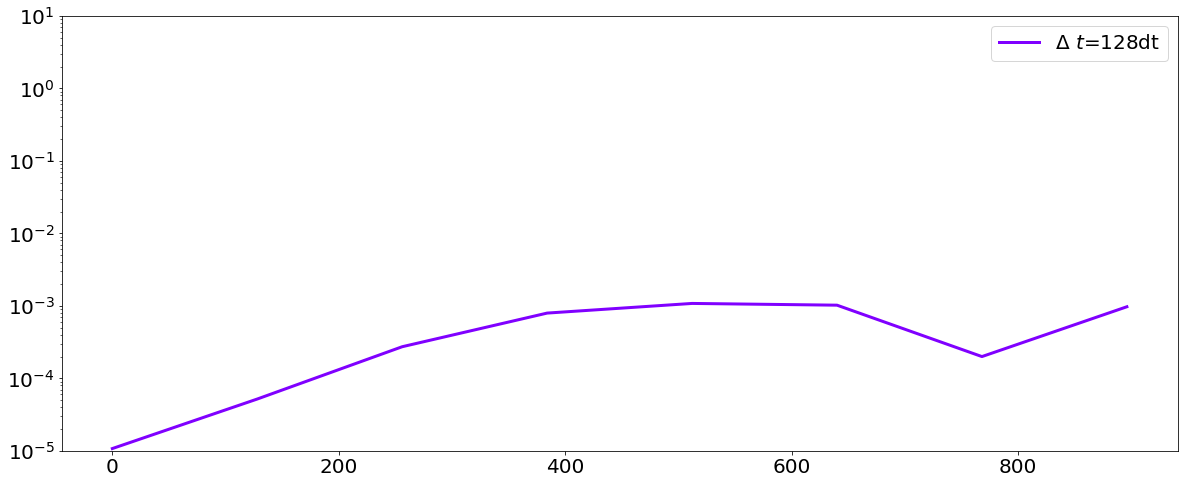

In [124]:
fig = plt.figure(figsize=(20, 8))
colors=iter(plt.cm.rainbow(np.linspace(0, 1, max_k-min_k)))
print(colors)
for k in range(max_k-min_k):
    err = preds_mse[k]
    mean = err.mean(0).detach().numpy()
#     print(np.mean(mean[::step_every]))
    rgb = next(colors)
    step_every = step_sizes[k]
    t = range(len(mean))
    plt.semilogy(t[::step_every], mean[::step_every], linestyle='-', color=rgb, linewidth=3.0, label='$\Delta\ t$={}dt'.format(step_sizes[k]))
plt.legend(fontsize=20, loc='upper right')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim([1e-5, 10])

In [125]:
#need to predict encoded dta in time and then decode

print(n_steps)
train_preds_time = model.uni_scale_forecast(torch.tensor(train_encoded[:, 0, :]).float(), n_steps=len(train_encoded[0])-1)
val_preds_time = model.uni_scale_forecast(torch.tensor(val_encoded[:, 0, :]).float(), n_steps=n_steps)
test_preds_time = model.uni_scale_forecast(torch.tensor(test_encoded[:, 0, :]).float(), n_steps=len(test_encoded[0])-1)
print(criterion(torch.tensor(train_encoded[:, 1:, :]).float(), train_preds_time).mean(-1).mean())
print(criterion(torch.tensor(val_encoded[:, 1:, :]).float(), val_preds_time).mean(-1).mean())
print(criterion(torch.tensor(test_encoded[:, 1:, :]).float(), test_preds_time).mean(-1).mean())
# train_encoded

#decode
print(train_preds_time.reshape((3499,3,3)).shape)
to_decode_train = torch.tensor(train_preds_time.reshape((3499,3,3))).unsqueeze(1).float()
train_decoded = model_space.decode(to_decode_train, model_space.cur_level)#.reshape((1, len(train_data), len(encoded[0,0])**2))
print(train_decoded.shape)

print(val_preds_time.shape)
to_decode_val = torch.tensor(val_preds_time.reshape((999,3,3))).unsqueeze(1).float()
val_decoded = model_space.decode(to_decode_val, model_space.cur_level)#.reshape((1, len(train_data), len(encoded[0,0])**2))

print(test_preds_time.shape)
to_decode_test = torch.tensor(test_preds_time.reshape((len(test_preds_time[0]),3,3)).unsqueeze(1).float())
test_decoded = model_space.decode(to_decode_test, model_space.cur_level)#.reshape((1, len(train_data), len(encoded[0,0])**2))
print(test_decoded.shape)

999
tensor(24.2636)
tensor(0.0384)
tensor(0.0437)
torch.Size([3499, 3, 3])
torch.Size([3499, 1, 7, 7])
torch.Size([1, 999, 9])
torch.Size([1, 499, 9])
torch.Size([499, 1, 7, 7])


<ipython-input-125-43de40601631>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_preds_time = model.uni_scale_forecast(torch.tensor(train_encoded[:, 0, :]).float(), n_steps=len(train_encoded[0])-1)
C:\Users\16kat\OneDrive - acornonsite.com\Time_Space_multiscale\src\ResNet.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds.insert(0, torch.tensor(x_init).float().to(self.device))
<ipython-input-125-43de40601631>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_preds_time = model.uni_scale_forecast(torch.tensor(val_encoded

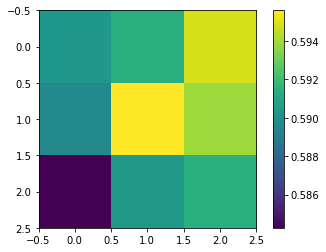

In [159]:
train_preds_time.shape
plt.imshow(train_preds_time[0,500].reshape(3,3))
plt.colorbar()

torch.Size([3499, 1, 7, 7])


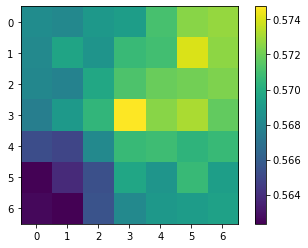

torch.Size([3500, 1, 7, 7])


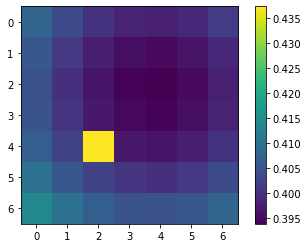

torch.Size([3499])


<ipython-input-155-606a83635194>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse =criterion(torch.tensor(train_decoded[:]).float(), train_data[:-1,].float()).mean( axis=(1, 2,3))


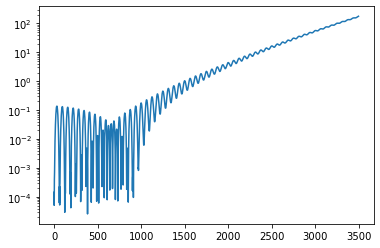

In [155]:
print(train_decoded.shape)
plt.imshow(train_decoded[499,0].detach().numpy())
plt.colorbar()
plt.show()
print(train_data.shape)
plt.imshow(train_data[21,0].detach().numpy())
plt.colorbar()
plt.show()

mse =criterion(torch.tensor(train_decoded[:]).float(), train_data[:-1,].float()).mean( axis=(1, 2,3))
print(mse.shape)
plt.semilogy(mse)

torch.Size([1, 499, 9])
torch.Size([999])


<ipython-input-128-3b41dfcb6fbd>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse =criterion(torch.tensor(val_decoded[:]).float(), val_data[:-1,].float()).mean( axis=(1,2,3))


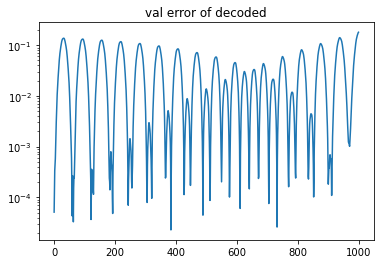

torch.Size([1, 499, 9])
torch.Size([499])


<ipython-input-128-3b41dfcb6fbd>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse =criterion(torch.tensor(test_decoded[:]).float(), test_data[:-1,].float()).mean( axis=(1,2,3))


Text(0.5, 1.0, 'test error of decoded')

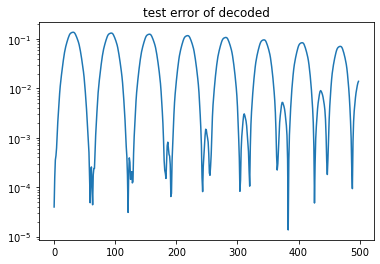

In [128]:

print(test_preds_time.shape)
mse =criterion(torch.tensor(val_decoded[:]).float(), val_data[:-1,].float()).mean( axis=(1,2,3))
print(mse.shape)
plt.semilogy(mse)
plt.title("val error of decoded")
plt.show()

print(test_preds_time.shape)
mse =criterion(torch.tensor(test_decoded[:]).float(), test_data[:-1,].float()).mean( axis=(1,2,3))
print(mse.shape)
plt.semilogy(mse)
plt.title("test error of decoded")

Animating, may take a little while...
..................Done! gif saved to  ../result/toy1_longer/decoded_test_7x7.gif


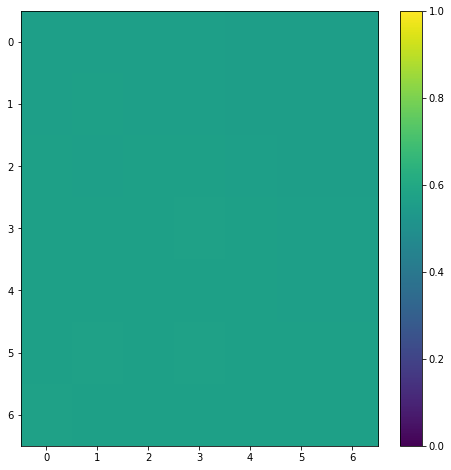

In [107]:
utils.animate(test_decoded.detach().numpy(), os.path.join(result_path, 'decoded_test_7x7.gif'))

In [148]:
# torch.tensor(train_decoded[:]).float(), train_data[:-1,].float())
print(train_decoded.shape)
tol = 0.1
fully_resolved, loss, resolved_map = net.check_pixel_level_loss(train_decoded[:499].float(), train_data[1:500,].float(), tol=tol, device = 'cpu')

torch.Size([3499, 1, 7, 7])


torch.Size([3, 3])


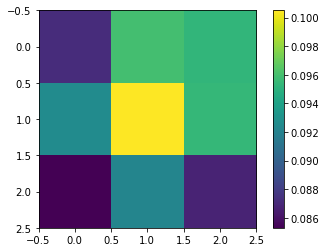

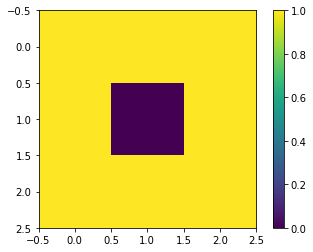

In [149]:
print(loss.shape)
plt.imshow(loss.detach().numpy())
plt.colorbar()
plt.show()

plt.imshow(resolved_map.detach().numpy())
plt.colorbar()
plt.show()